In [1]:
#Setting up modules
import cv2
import time
import numpy as np
import pathlib
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.metrics import accuracy_score, classification_report
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense 
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [2]:
#Setting up datasets
data_train = pd.read_csv("Emergency_Vehicles/train.csv")
data_train.head()

,image_names,emergency_or_not
0,1503.jpg,0
1,1420.jpg,0
2,1764.jpg,0
3,1356.jpg,0
4,1117.jpg,0


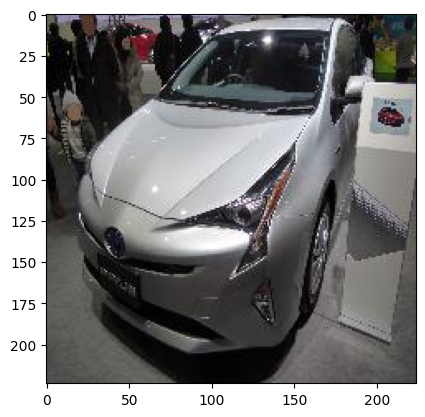

In [3]:
#Viewing images
img = load_img(f"Emergency_vehicles/train/1503.jpg",target_size=(224,224))
plt.imshow(img)
plt.show()

In [4]:
#Preprocessing images  - Image to array
def preprocessing_img(file_path):
    img = load_img(f"Emergency_vehicles/train/{file_path}",target_size=(224,224))
    
    img_array = img_to_array(img)
    img_array /= 255.0
    return img_array

data_train["img_array"] = data_train["image_names"].apply(preprocessing_img)
data_train.head()

,image_names,emergency_or_not,img_array
0,1503.jpg,0,"[[[0.36862746, 0.3764706, 0.2901961], [0.38431..."
1,1420.jpg,0,"[[[0.84705883, 0.9137255, 0.9764706], [0.85098..."
2,1764.jpg,0,"[[[0.24313726, 0.2509804, 0.2], [0.22352941, 0..."
3,1356.jpg,0,"[[[0.7647059, 0.84705883, 0.7176471], [0.62352..."
4,1117.jpg,0,"[[[0.0, 0.03137255, 0.0], [0.1254902, 0.160784..."


In [5]:
#Setting up Dense Neural Network
model = Sequential()
model.add(Flatten(input_shape=(224, 224, 3)))  # Adjust input shape based on your images
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [6]:
# Compling Neural Network
model.compile(optimizer = "adam",loss="binary_crossentropy",metrics=['accuracy'])

In [7]:
#Fitting dataSets
x_train = np.array(data_train['img_array'].tolist())
y_train = np.array(data_train['emergency_or_not'])
model.fit(x_train,y_train,epochs=10, batch_size=32)

Epoch 1/10


52/52 [==============================] - 11s 177ms/step - loss: 7.3289 - accuracy: 0.5413
Epoch 2/10
52/52 [==============================] - 9s 170ms/step - loss: 1.2102 - accuracy: 0.6452
Epoch 3/10
52/52 [==============================] - 9s 166ms/step - loss: 1.2422 - accuracy: 0.6652
Epoch 4/10
52/52 [==============================] - 9s 168ms/step - loss: 1.1006 - accuracy: 0.7102
Epoch 5/10
52/52 [==============================] - 9s 167ms/step - loss: 0.5780 - accuracy: 0.7637
Epoch 6/10
52/52 [==============================] - 9s 173ms/step - loss: 0.4996 - accuracy: 0.7910
Epoch 7/10
52/52 [==============================] - 9s 173ms/step - loss: 0.9969 - accuracy: 0.6883
Epoch 8/10
52/52 [==============================] - 9s 169ms/step - loss: 0.4644 - accuracy: 0.8153
Epoch 9/10
52/52 [==============================] - 9s 168ms/step - loss: 0.3491 - accuracy: 0.8445
Epoch 10/10
52/52 [==============================] - 9s 168ms/step - loss: 0.5591 - accuracy: 0.8

In [8]:
#Testing Datasets
data_test =pd.read_csv("Emergency_Vehicles/test.csv")
data_test.head()

,image_names,prediction
0,1960.jpg,0
1,668.jpg,1
2,2082.jpg,0
3,808.jpg,1
4,1907.jpg,0


In [14]:
def preprocessing_img_test(file_path):
    img = load_img(f"Emergency_vehicles/test/{file_path}",target_size=(224,224))
    
    img_array = img_to_array(img)
    img_array /= 255.0
    return img_array

data_test["img_array"] = data_test["image_names"].apply(preprocessing_img_test)
data_test.head()

,image_names,prediction,img_array
0,1960.jpg,0,"[[[0.47843137, 0.47058824, 0.5254902], [0.4470..."
1,668.jpg,1,"[[[0.92156863, 0.972549, 1.0], [0.92156863, 0...."
2,2082.jpg,0,"[[[0.07450981, 0.1254902, 0.05882353], [0.0235..."
3,808.jpg,1,"[[[0.105882354, 0.10980392, 0.09019608], [0.16..."
4,1907.jpg,0,"[[[0.6901961, 0.7294118, 0.69411767], [0.65882..."


In [15]:
#Testing DataSets
x_test = np.array(data_test['img_array'].tolist())
y_test = np.array(data_test['prediction'])
print(y_test)

[0 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1
 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 1 0
 0 0 1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0
 1 1 0 1 1 0 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1
 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 1
 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0
 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 1
 0 1 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 0 1 0 1 1
 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0
 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1
 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1
 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 0
 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0
 1 0 1 1 1 0 1 1 0 0 1 1 

In [16]:
#Predicting ...
y_predict = model.predict(x_test)
y_predict_binary = (y_predict > 0.5).astype(int)
print(y_predict_binary)

23/23 [==============================] - 0s 14ms/step
[[0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 

In [17]:
# Accurancy Score 
accuracy = accuracy_score(y_test,y_predict_binary)
print(f"Accuracy : {accuracy*100:2f}%")
print("Classification Report:\n",classification_report(y_test,y_predict_binary))

Accuracy : 69.546742%
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.83      0.72       325
           1       0.80      0.58      0.67       381

    accuracy                           0.70       706
   macro avg       0.72      0.71      0.69       706
weighted avg       0.72      0.70      0.69       706

